In [3]:
# ------------------------------------------------
# 
# sil vs cc data, plotting the initial R for 
# different weathering v grain size distribution
# parameterizations
# 
# (note, takes
# files that were generated in the scratch/cdr_
# ...feedstock_compare-apprate+psize.ipynb file)
# 
# ------------------------------------------------
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for custom legend entries (needed for contour plot)
import cmocean.cm as cmo
import pickle
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


# set data path
datpath = "/home/tykukla/ew-workflows/scripts/scepter/process/runs/batch_postproc_tmp/cc-sil_psize_apprate"

# --- select which data to read in 
# [PSD ON]
# fert level 1 
fertLevel_1a = "hi"
idx_1a = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_1a = "base_psdfull" # "basev3_multiCTRL"

# fert level 2
fertLevel_2a = "low"
idx_2a = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_2a = "base_psdfull"   # "basev3_multiCTRL"



# [PSD OFF]
# fert level 1 
fertLevel_1b = "hi"
idx_1b = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_1b = "base" # "basev3_multiCTRL"

# fert level 2
fertLevel_2b = "low"
idx_2b = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_2b = "base"   # "basev3_multiCTRL"



# [GEOMETRIC SA]
# fert level 1 
fertLevel_1c = "hi"
idx_1c = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_1c = "base_geomsa" # "basev3_multiCTRL"

# fert level 2
fertLevel_2c = "low"
idx_2c = "001" # [(no tag): 009=0.2 ton cc/ha/yr; 012=0.5 ton cc/ha/yr; 002=0.8 ton cc/ha/yr; 011=1.4 ton cc/ha/yr] 
tag_sil_2c = "base_geomsa"   # "basev3_multiCTRL"


In [4]:
# ---- READ IN DATA
# [PSD ON]
# fert level 1
datdir_1a = f"meanAnn_shortRun_{fertLevel_1a}Fert_{tag_sil_1a}_{idx_1a}"    
datloc_1a = os.path.join(datpath, datdir_1a)
# read in xr datasets
dssil1a = xr.open_dataset(os.path.join(datloc_1a, 'ds_sil.nc'))
dscc1a = xr.open_dataset(os.path.join(datloc_1a, 'ds_cc.nc'))
ds_anom1a = xr.open_dataset(os.path.join(datloc_1a, 'ds_anom.nc'))

# fert level 2
datdir_2a = f"meanAnn_shortRun_{fertLevel_2a}Fert_{tag_sil_2a}_{idx_2a}"    
datloc_2a = os.path.join(datpath, datdir_2a)
# read in xr datasets
dssil2a = xr.open_dataset(os.path.join(datloc_2a, 'ds_sil.nc'))
dscc2a = xr.open_dataset(os.path.join(datloc_2a, 'ds_cc.nc'))
ds_anom2a = xr.open_dataset(os.path.join(datloc_2a, 'ds_anom.nc'))



# [PSD OFF]
# fert level 1
datdir_1b = f"meanAnn_shortRun_{fertLevel_1b}Fert_{tag_sil_1b}_{idx_1b}"    
datloc_1b = os.path.join(datpath, datdir_1b)
# read in xr datasets
dssil1b = xr.open_dataset(os.path.join(datloc_1b, 'ds_sil.nc'))
dscc1b = xr.open_dataset(os.path.join(datloc_1b, 'ds_cc.nc'))
ds_anom1b = xr.open_dataset(os.path.join(datloc_1b, 'ds_anom.nc'))

# fert level 2
datdir_2b = f"meanAnn_shortRun_{fertLevel_2b}Fert_{tag_sil_2b}_{idx_2b}"    
datloc_2b = os.path.join(datpath, datdir_2b)
# read in xr datasets
dssil2b = xr.open_dataset(os.path.join(datloc_2b, 'ds_sil.nc'))
dscc2b = xr.open_dataset(os.path.join(datloc_2b, 'ds_cc.nc'))
ds_anom2b = xr.open_dataset(os.path.join(datloc_2b, 'ds_anom.nc'))



# [GEOMSA]
# fert level 1
datdir_1c = f"meanAnn_shortRun_{fertLevel_1c}Fert_{tag_sil_1c}_{idx_1c}"    
datloc_1c = os.path.join(datpath, datdir_1c)
# read in xr datasets
dssil1c = xr.open_dataset(os.path.join(datloc_1c, 'ds_sil.nc'))
dscc1c = xr.open_dataset(os.path.join(datloc_1c, 'ds_cc.nc'))
ds_anom1c = xr.open_dataset(os.path.join(datloc_1c, 'ds_anom.nc'))

# fert level 2
datdir_2c = f"meanAnn_shortRun_{fertLevel_2c}Fert_{tag_sil_2c}_{idx_2c}"    
datloc_2c = os.path.join(datpath, datdir_2c)
# read in xr datasets
dssil2c = xr.open_dataset(os.path.join(datloc_2c, 'ds_sil.nc'))
dscc2c = xr.open_dataset(os.path.join(datloc_2c, 'ds_cc.nc'))
ds_anom2c = xr.open_dataset(os.path.join(datloc_2c, 'ds_anom.nc'))


In [16]:
# --- compute emissions scenario (if the default isn't the one we want)
import sys
# --- read in cdr calculation functions  
sys.path.append(os.path.abspath('/home/tykukla/ew-workflows/run_scepter'))
import cdr_fxns_postproc as cfp
# ---
# ******************************************************
# --- SILICATE DUST SPECIES
dustsp = 'gbas'
# --- VARIABLE COLUMNS
dfin_cols_to_keep = ["dustrad", "dustrate_ton_ha_yr"]
# --- CDR CALCULATIONS
cdr_calc_list = ["co2_flx",       
                 "camg_flx",
                 "totcat_flx",
                 # "carbalk_flx", # (turn this back on when the runs are re-run with fixed cflx file)
                 "rockdiss"]
# ******************************************************
fertLevel_1 = fertLevel_1a
fertLevel_2 = fertLevel_2a
tag_sil_1 = tag_sil_1a
tag_sil_2 = tag_sil_2a
idx_1 = idx_1a
idx_2 = idx_2a

# --- read in df dicts
datdir_1 = f"meanAnn_shortRun_{fertLevel_1}Fert_{tag_sil_1}_{idx_1}"    
datloc_1 = os.path.join(datpath, datdir_1)
fn_cc = "cdr_dfs_cc.pkl"
fn_sil = "cdr_dfs_sil.pkl"

datdir_2 = f"meanAnn_shortRun_{fertLevel_2}Fert_{tag_sil_2}_{idx_2}"    
datloc_2 = os.path.join(datpath, datdir_2)
fn_cc = "cdr_dfs_cc.pkl"
fn_sil = "cdr_dfs_sil.pkl"

cdr_dict_sum_cc1 = pd.read_pickle(os.path.join(datloc_1, fn_cc))
cdr_dict_sum_sil1 = pd.read_pickle(os.path.join(datloc_1, fn_sil))

cdr_dict_sum_cc2 = pd.read_pickle(os.path.join(datloc_2, fn_cc))
cdr_dict_sum_sil2 = pd.read_pickle(os.path.join(datloc_2, fn_sil))


# --- get emissions 
dustrate_name = "dustrate_ton_ha_yr" # note, we multiply by duration in emissions_calc, so we only want annual rate here
# set the inputs ***************
p80_inputcc, p80_inputsil = 1.3e3, 1.3e3
truck_kmcc, truck_kmsil = 0.1e3, 0.1e3
barge_kmcc, barge_kmsil = 0.0e3, 0.0e3
barge_diesel_kmcc, barge_diesel_kmsil = 0, 0
Efactor_orgcc, Efactor_orgsil = "MRO", "MRO"
# ******************************

# FERT LEVEL 1
# [CALCITE]
cdr_dict_sum_cc1['rockdiss'] = cfp.emissions_calculator_df(cdr_dict_sum_cc1['rockdiss'], dustrate_name, 
                                                        p80_inputcc, truck_kmcc, barge_kmcc, barge_diesel_kmcc, 
                                                        Efactor_orgcc, mineral="cc")
# [SILICATE]
cdr_dict_sum_sil1['rockdiss'] = cfp.emissions_calculator_df(cdr_dict_sum_sil1['rockdiss'], dustrate_name, 
                                                        p80_inputsil, truck_kmsil, barge_kmsil, barge_diesel_kmsil, 
                                                        Efactor_orgsil, mineral=dustsp)


# FERT LEVEL 2
# [CALCITE]
cdr_dict_sum_cc2['rockdiss'] = cfp.emissions_calculator_df(cdr_dict_sum_cc2['rockdiss'], dustrate_name, 
                                                        p80_inputcc, truck_kmcc, barge_kmcc, barge_diesel_kmcc, 
                                                        Efactor_orgcc, mineral="cc")
# [SILICATE]
cdr_dict_sum_sil2['rockdiss'] = cfp.emissions_calculator_df(cdr_dict_sum_sil2['rockdiss'], dustrate_name, 
                                                        p80_inputsil, truck_kmsil, barge_kmsil, barge_diesel_kmsil, 
                                                        Efactor_orgsil, mineral=dustsp)


# --- compute CDR w/ loss rates and convert to xr datasets
dscc1e = cfp.cdr_ds(cdr_dict = cdr_dict_sum_cc1, dims = dfin_cols_to_keep, cdr_calc_list = cdr_calc_list)
dssil1e = cfp.cdr_ds(cdr_dict = cdr_dict_sum_sil1, dims = dfin_cols_to_keep, cdr_calc_list = cdr_calc_list)

dscc2e = cfp.cdr_ds(cdr_dict = cdr_dict_sum_cc2, dims = dfin_cols_to_keep, cdr_calc_list = cdr_calc_list)
dssil2e = cfp.cdr_ds(cdr_dict = cdr_dict_sum_sil2, dims = dfin_cols_to_keep, cdr_calc_list = cdr_calc_list)

# combine xr datasets as dict
# cdr_ds_dict1 = {"cc": dscc1, dustsp: dssil1}
# cdr_ds_dict2 = {"cc": dscc2, dustsp: dssil2}

solving co2_flx
solving camg_flx
solving totcat_flx
solving rockdiss
solving co2_flx
solving camg_flx
solving totcat_flx
solving rockdiss
solving co2_flx
solving camg_flx
solving totcat_flx
solving rockdiss
solving co2_flx
solving camg_flx
solving totcat_flx
solving rockdiss


NameError: name 'dscc1' is not defined

## Plot 1
Just the lowFert case to hone in on the different shapes of the solution space between the three options

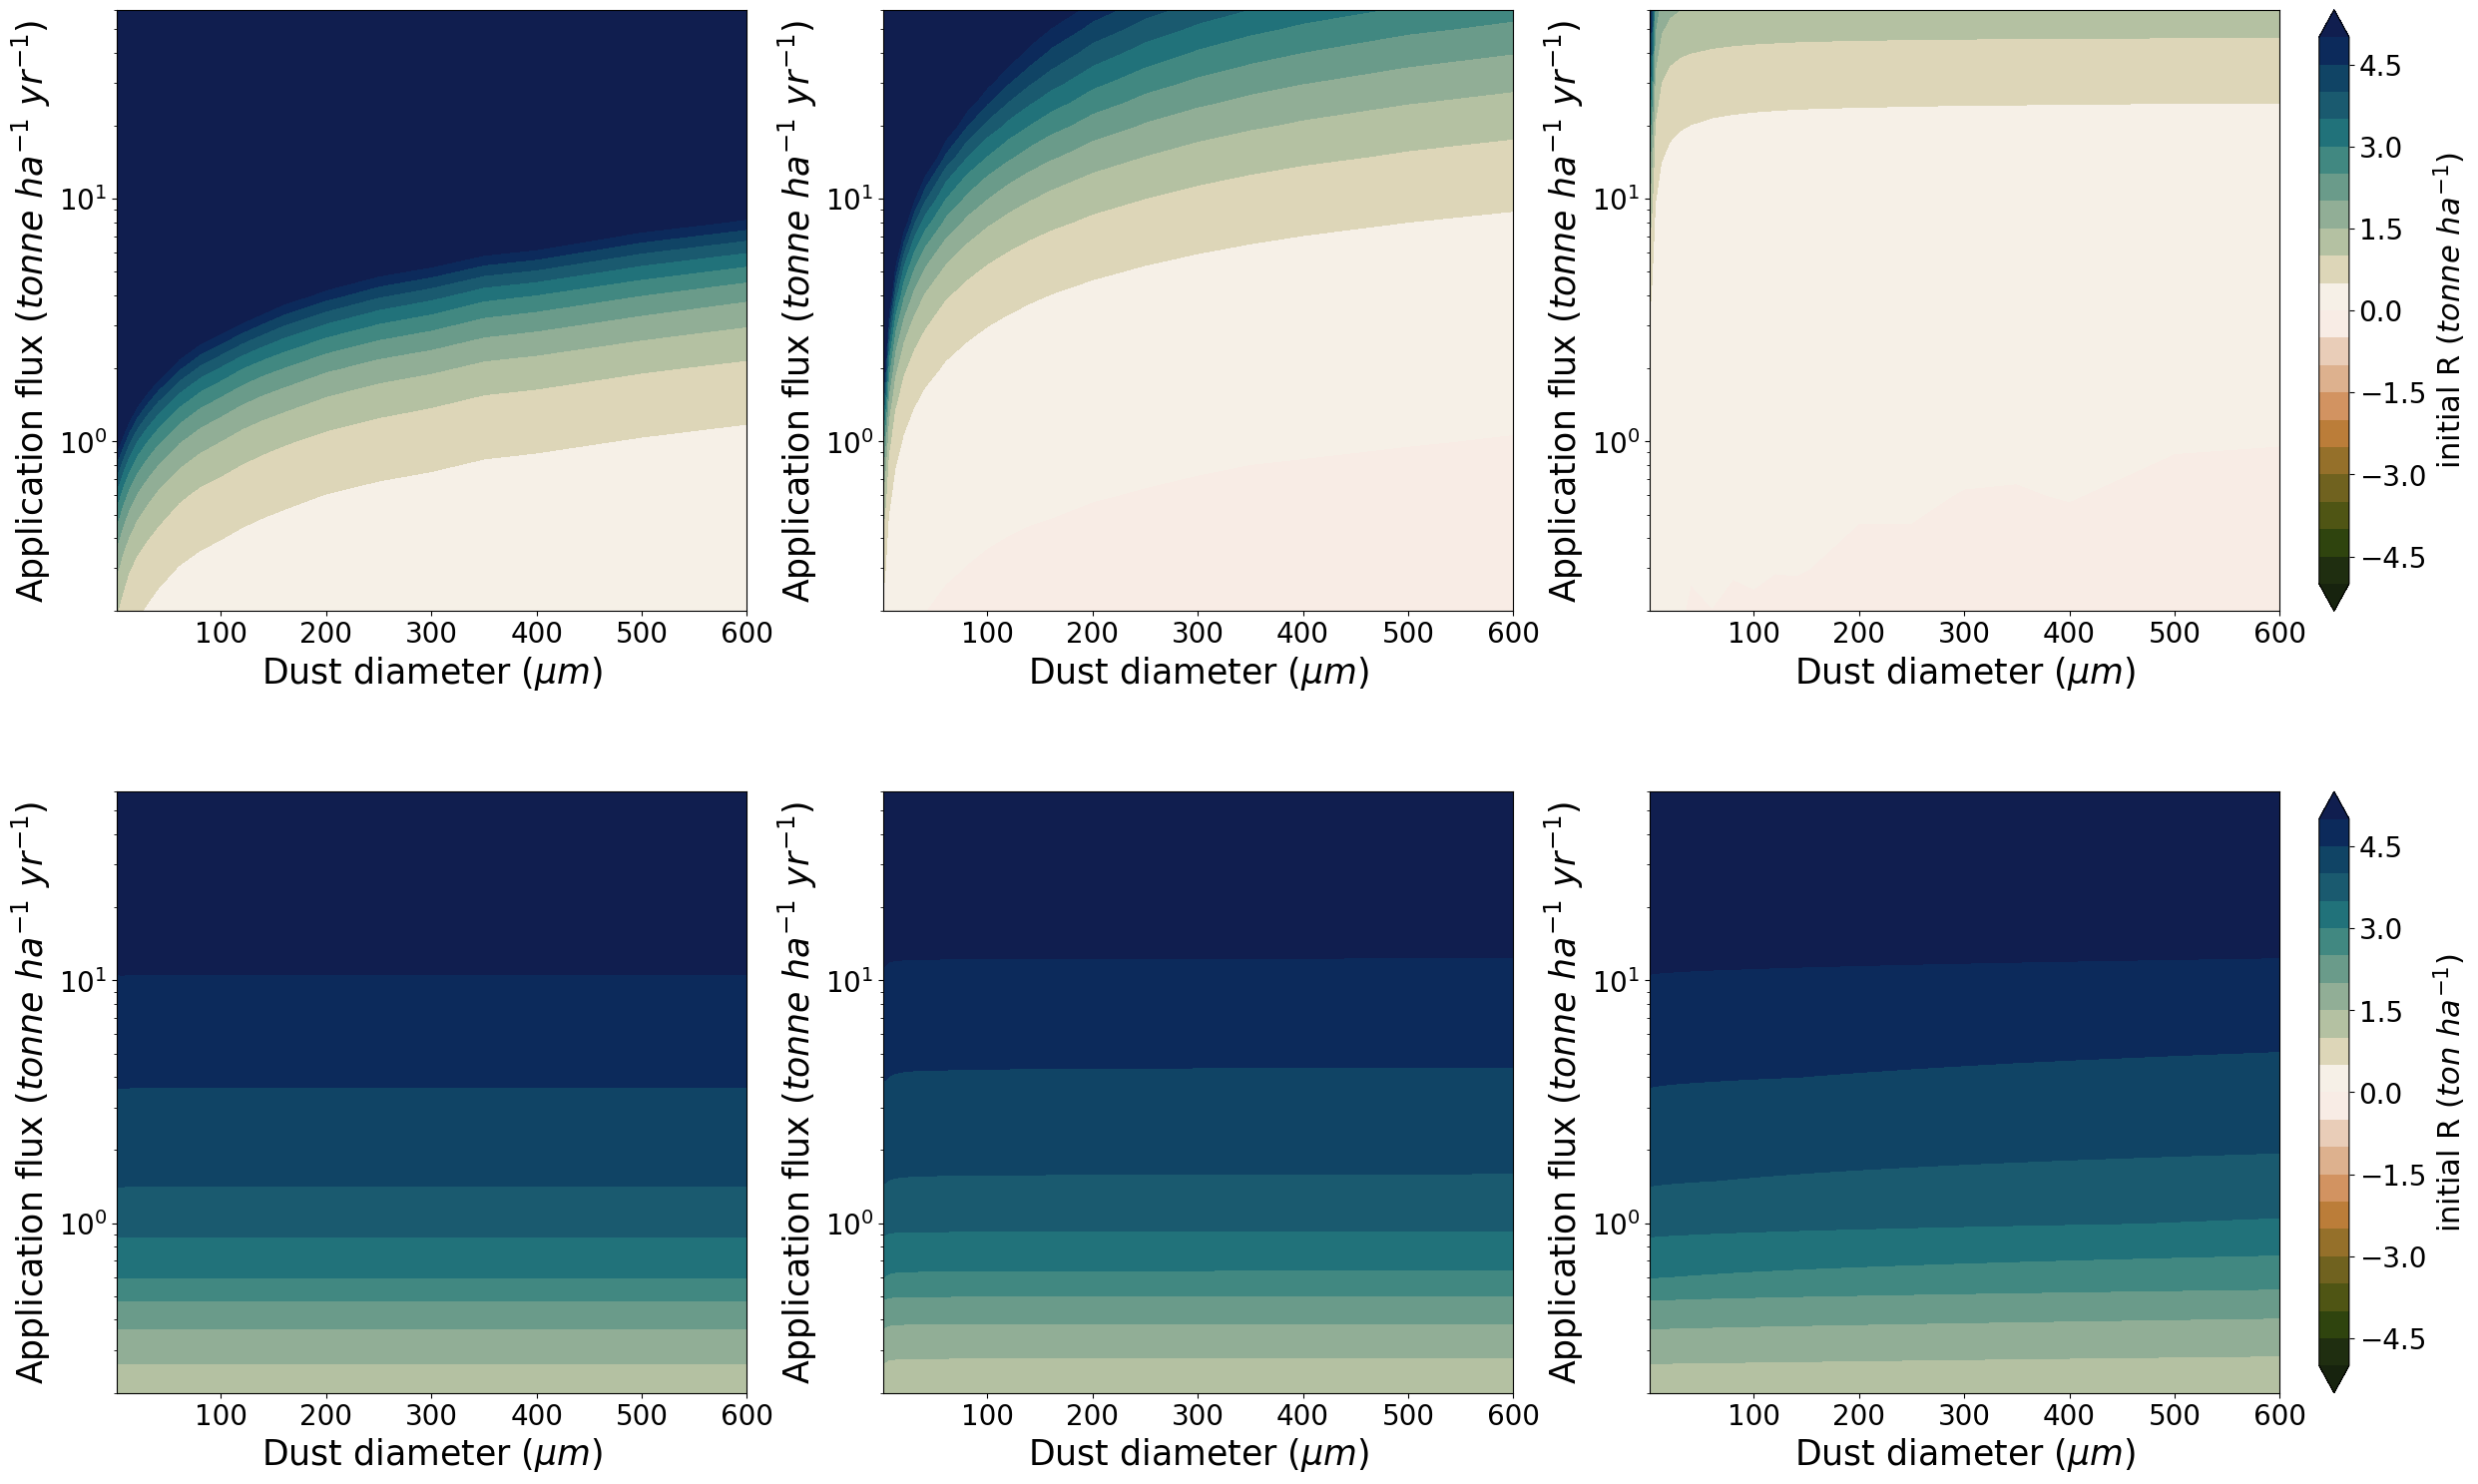

In [18]:
# --- PART 1: 3 columns (different wx parameterizations) and 2 rows (basalt and calcite) 
# set data conditions
cdr_var = 'cdr_dif' # 'co2pot_adv_tonHa_camg'  # 'co2pot_tot_tonHa_camg'
loss_perc = 0
logX = False
logY = True
addLimeBaseline = False

# pull out the data we want
dssil2a_p3 = dssil2a.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2a_p3 = dscc2a.sel(loss_percent = loss_perc, method='nearest')[cdr_var]

dssil2b_p3 = dssil2b.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2b_p3 = dscc2b.sel(loss_percent = loss_perc, method='nearest')[cdr_var]

dssil2c_p3 = dssil2c.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2c_p3 = dscc2c.sel(loss_percent = loss_perc, method='nearest')[cdr_var]


# get the lime baseline data
cf_apprate = ds_anom2a.cf_apprate.values
cf_dustrad = ds_anom2a.cf_dustrad.values * 2

# # interpolate to fill nans (they're rare, 
# # but present in a couple cases where a run didn't complete)
dssil2a_p3 = dssil2a_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2a_p3 = dscc2a_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

dssil2b_p3 = dssil2b_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2b_p3 = dscc2b_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

dssil2c_p3 = dssil2c_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2c_p3 = dscc2c_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()



# *****************************
# --- plot aesthetics
include_titles = False
# color palette
col = cmo.tarn
# lime baseline
ptsize = 200
ptcol = 'black'
lwd_base = 3
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 33    # plot title
fs_cbarlab = 22  # colorbar title
fs_cbartick = 20 # colorbar ticks
# color limits
cmin, cmax = -5, 5
cbar_extend = "both"    # both, max, or min
# axis limits
xmin, xmax = (2 if logX else 1), 600
ymin, ymax = (0.2 if logY else 0), 60 
# *****************************

# x and y arrays
# [fertlevel 2a, sil]
x2asil = dssil2a_p3['dustrad'].values
y2asil = dssil2a_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2a, cc]
x2acc = dscc2a_p3['dustrad'].values
y2acc = dscc2a_p3['dustrate_ton_ha_yr'].values

# [fertlevel 2b, sil]
x2bsil = dssil2b_p3['dustrad'].values
y2bsil = dssil2b_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2b, cc]
x2bcc = dscc2b_p3['dustrad'].values
y2bcc = dscc2b_p3['dustrate_ton_ha_yr'].values

# [fertlevel 2c, sil]
x2csil = dssil2c_p3['dustrad'].values
y2csil = dssil2c_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2c, cc]
x2ccc = dscc2c_p3['dustrad'].values
y2ccc = dscc2c_p3['dustrate_ton_ha_yr'].values





# Define the midpoint normalization
# norm = TwoSlopeNorm(vmin=ds_anom[pvar].min(), vmax=ds_anom[pvar].max(), vcenter=0)
# norm = TwoSlopeNorm(vmin=cmin, vmax=cmax,vcenter=0)

# --- SET UP PLOT
# set up grid 
spec = GridSpec(ncols=3, nrows=2, hspace=0.3, width_ratios=[0.8, 0.8, 1])
fig = plt.figure(figsize=(30,18))


# --- CASE A --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[0])
contour = plt.contourf(x2asil*2,y2asil,dssil2a_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# --- cc
ax = plt.subplot(spec[3])
contour = plt.contourf(x2acc*2,y2acc,dscc2a_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# ****
if addLimeBaseline:
    plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
    plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
    plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# ****
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("calcite", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# --- CASE B --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[1])
contour = plt.contourf(x2bsil*2,y2bsil,dssil2b_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# --- cc
ax = plt.subplot(spec[4])
contour = plt.contourf(x2bcc*2,y2bcc,dscc2b_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# ****
if addLimeBaseline:
    plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
    plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
    plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# ****
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("calcite", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


# --- CASE C --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[2])
contour = plt.contourf(x2csil*2,y2csil,dssil2c_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
cbar = plt.colorbar(contour)
cbar.set_label(r"initial R $(tonne\ ha^{-1})$", fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# --- cc
ax = plt.subplot(spec[5])
contour = plt.contourf(x2ccc*2,y2ccc,dscc2c_p3.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# ****
if addLimeBaseline:
    plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
    plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
    plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# ****
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("calcite", fontsize=fs_title) if include_titles else "")
cbar = plt.colorbar(contour)
cbar.set_label(r"initial R $(ton\ ha^{-1})$", fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);



(0.2, 60)

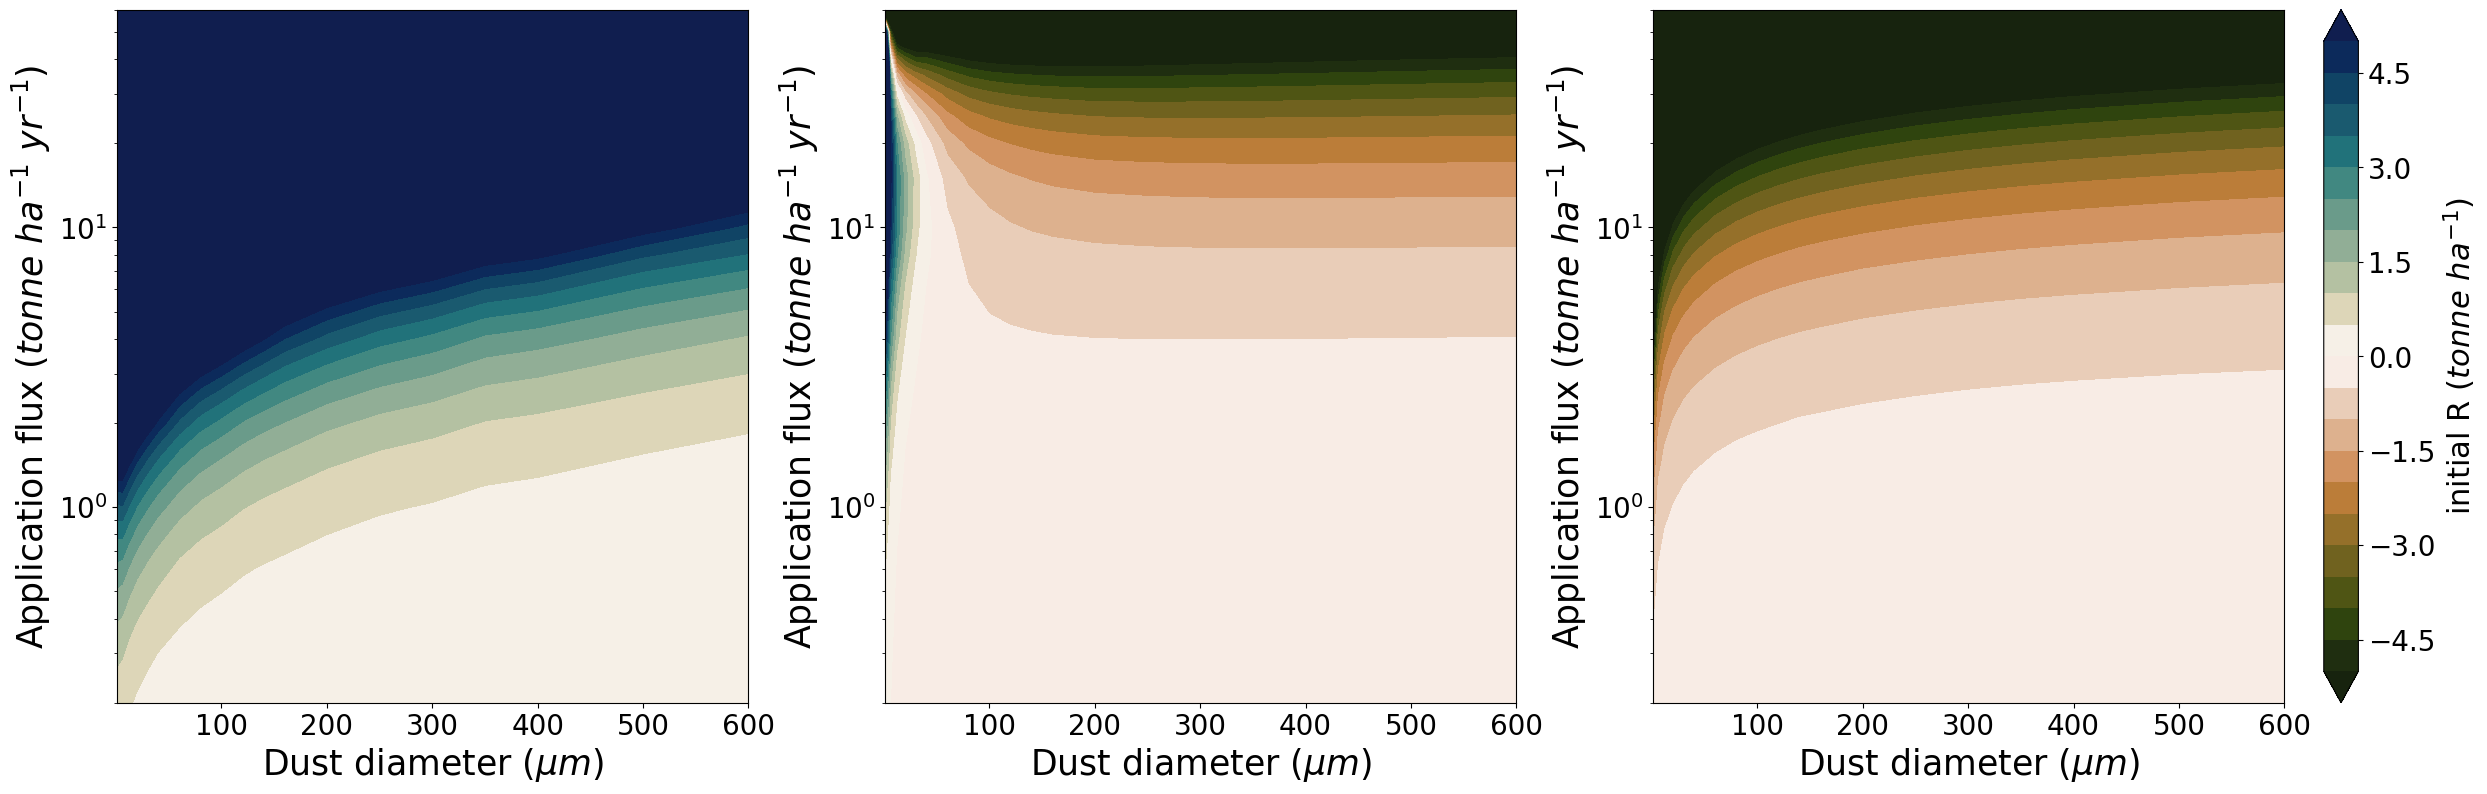

In [19]:
# --- PLOT 
# R MINUS E, BASALT ONLY

# --- PART 1: 3 columns (different wx parameterizations) 
# set data conditions
cdr_var = 'cdr_dif' # 'co2pot_adv_tonHa_camg'  # 'co2pot_tot_tonHa_camg'
e_var = "E_total_tonCO2_ha"
loss_perc = 0
logX = False
logY = True
addLimeBaseline = False

# pull out the data we want
# [removal]
dssil2a_p3 = dssil2a.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2a_p3 = dscc2a.sel(loss_percent = loss_perc, method='nearest')[cdr_var]

dssil2b_p3 = dssil2b.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2b_p3 = dscc2b.sel(loss_percent = loss_perc, method='nearest')[cdr_var]

dssil2c_p3 = dssil2c.sel(loss_percent = loss_perc, method='nearest')[cdr_var]
dscc2c_p3 = dscc2c.sel(loss_percent = loss_perc, method='nearest')[cdr_var]

# [emissions]
dssile = dssil2e.sel(loss_percent = loss_perc, method='nearest')[e_var]
dscce = dscc2e.sel(loss_percent = loss_perc, method='nearest')[e_var]



# # get the lime baseline data
# cf_apprate = ds_anom2a.cf_apprate.values
# cf_dustrad = ds_anom2a.cf_dustrad.values * 2

# # interpolate to fill nans (they're rare, 
# # but present in a couple cases where a run didn't complete)
dssil2a_p3 = dssil2a_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2a_p3 = dscc2a_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

dssil2b_p3 = dssil2b_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2b_p3 = dscc2b_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

dssil2c_p3 = dssil2c_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscc2c_p3 = dscc2c_p3.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()

dssile = dssile.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()
dscce = dscce.interpolate_na(dim='dustrate_ton_ha_yr', method='linear').copy()


# *****************************
# --- plot aesthetics
include_titles = False
# color palette
col = cmo.tarn
# lime baseline
ptsize = 200
ptcol = 'black'
lwd_base = 3
# set fontsizes
fs_xlab = 25     # x title
fs_ylab = 25     # y title
fs_tick = 20     # ticks, bot haxes
fs_title = 33    # plot title
fs_cbarlab = 22  # colorbar title
fs_cbartick = 20 # colorbar ticks
# color limits
cmin, cmax = -5, 5
cbar_extend = "both"    # both, max, or min
# axis limits
xmin, xmax = (2 if logX else 1), 600
ymin, ymax = (0.2 if logY else 0), 60 
# *****************************

# x and y arrays
# [fertlevel 2a, sil]
x2asil = dssil2a_p3['dustrad'].values
y2asil = dssil2a_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2a, cc]
x2acc = dscc2a_p3['dustrad'].values
y2acc = dscc2a_p3['dustrate_ton_ha_yr'].values

# [fertlevel 2b, sil]
x2bsil = dssil2b_p3['dustrad'].values
y2bsil = dssil2b_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2b, cc]
x2bcc = dscc2b_p3['dustrad'].values
y2bcc = dscc2b_p3['dustrate_ton_ha_yr'].values

# [fertlevel 2c, sil]
x2csil = dssil2c_p3['dustrad'].values
y2csil = dssil2c_p3['dustrate_ton_ha_yr'].values
# [fertlevel 2c, cc]
x2ccc = dscc2c_p3['dustrad'].values
y2ccc = dscc2c_p3['dustrate_ton_ha_yr'].values





# Define the midpoint normalization
# norm = TwoSlopeNorm(vmin=ds_anom[pvar].min(), vmax=ds_anom[pvar].max(), vcenter=0)
# norm = TwoSlopeNorm(vmin=cmin, vmax=cmax,vcenter=0)

# --- SET UP PLOT
# set up grid 
spec = GridSpec(ncols=3, nrows=1, hspace=0.3, width_ratios=[0.8, 0.8, 1])
fig = plt.figure(figsize=(30,9))


# --- CASE A --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[0])
contour = plt.contourf(x2asil*2,y2asil,dssil2a_p3.transpose() - dssile.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# # --- cc
# ax = plt.subplot(spec[3])
# contour = plt.contourf(x2acc*2,y2acc,dscc2a_p3.transpose(), 
#                         levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# # contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# # plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# # ****
# if addLimeBaseline:
#     plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
#     plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
#     plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# # ****
# plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
# plt.ylabel(r"Application flux $(ton\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
# plt.tick_params(axis='both', labelsize=fs_tick)
# (plt.title("calcite", fontsize=fs_title) if include_titles else "")
# (plt.xscale('log') if logX else "")
# (plt.yscale('log') if logY else "")
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)


# --- CASE B --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[1])
contour = plt.contourf(x2bsil*2,y2bsil,dssil2b_p3.transpose() - dssile.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# # --- cc
# ax = plt.subplot(spec[4])
# contour = plt.contourf(x2bcc*2,y2bcc,dscc2b_p3.transpose(), 
#                         levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# # contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# # plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# # ****
# if addLimeBaseline:
#     plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
#     plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
#     plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# # ****
# plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
# plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
# plt.tick_params(axis='both', labelsize=fs_tick)
# (plt.title("calcite", fontsize=fs_title) if include_titles else "")
# (plt.xscale('log') if logX else "")
# (plt.yscale('log') if logY else "")
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)


# --- CASE C --------------------------------------------------------------------------
# --- sil
ax = plt.subplot(spec[2])
contour = plt.contourf(x2csil*2,y2csil,dssil2c_p3.transpose() - dssile.transpose(), 
                        levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
plt.tick_params(axis='both', labelsize=fs_tick)
(plt.title("basalt", fontsize=fs_title) if include_titles else "")
cbar = plt.colorbar(contour)
cbar.set_label(r"initial R $(tonne\ ha^{-1})$", fontsize=fs_cbarlab)
cbar.ax.tick_params(labelsize=fs_cbartick)
(plt.xscale('log') if logX else "")
(plt.yscale('log') if logY else "")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# # --- cc
# ax = plt.subplot(spec[5])
# contour = plt.contourf(x2ccc*2,y2ccc,dscc2c_p3.transpose(), 
#                         levels=np.linspace(cmin, cmax, 21), cmap = col, vmin=cmin, vmax=cmax, extend=cbar_extend)
# # contour_line = plt.contour(x2cc,y2cc,dscc2_p3.transpose(),levels=[0], colors='black', linewidths=2)
# # plt.axhline(y=50, color='darkgray', linestyle='dashed', linewidth=1)
# # ****
# if addLimeBaseline:
#     plt.vlines(x=cf_dustrad, ymin=ymin, ymax=cf_apprate, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # vertical line
#     plt.hlines(y=cf_apprate, xmin=xmin, xmax=cf_dustrad, colors=ptcol, linestyles='dashed', linewidths=lwd_base)    # horizontal line
#     plt.scatter(cf_dustrad, cf_apprate, s=ptsize, c=ptcol)   # point
# # ****
# plt.xlabel(r"Dust diameter $(\mu m)$", fontsize=fs_xlab)
# plt.ylabel(r"Application flux $(tonne\ ha^{-1}\ yr^{-1})$", fontsize=fs_xlab)
# plt.tick_params(axis='both', labelsize=fs_tick)
# (plt.title("calcite", fontsize=fs_title) if include_titles else "")
# cbar = plt.colorbar(contour)
# cbar.set_label(r"initial R $(ton\ ha^{-1})$", fontsize=fs_cbarlab)
# cbar.ax.tick_params(labelsize=fs_cbartick)
# (plt.xscale('log') if logX else "")
# (plt.yscale('log') if logY else "")
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax);



In [ ]:
# --------------